In [9]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [32]:
df = pd.read_csv("../data/flight_data.csv")

df = df.drop(columns=['Unnamed: 0', 'flight'])

df['departure_time'] = df['departure_time'].replace({
    "Early_Morning": "Early Morning",
    "Late_Night": "Late Night"
})
df['arrival_time'] = df['departure_time'].replace({
    "Early_Morning": "Early Morning",
    "Late_Night": "Late Night"
})
df['airline'] = df['airline'].replace({
    "GO_FIRST": "GO FIRST",
    "Air_India": "Air India",
})
df['stops'] = df['stops'].replace({
    "zero": "0",
    "one": "1",
    "two_or_more": "2",
})

df.columns = df.columns.str.strip()
print(df.columns)

df

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Evening,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early Morning,0,Early Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early Morning,0,Early Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Morning,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Afternoon,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early Morning,1,Early Morning,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early Morning,1,Early Morning,Hyderabad,Business,10.00,49,81585


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [38]:
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns, drop_first=True)

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [42]:
# Predictions on test data
y_pred = lr_model.predict(X_test)

# Compute error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

MAE: 4560.47
MSE: 45968856.73
RMSE: 6780.03
R² Score: 0.9108


/usr/lib/python3/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


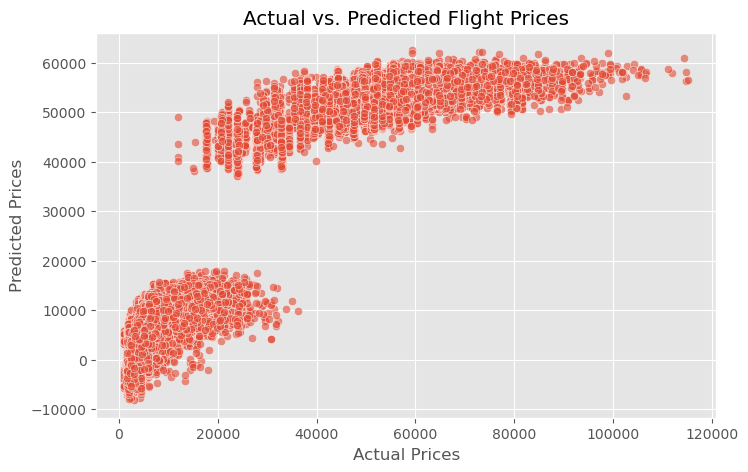

In [43]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Flight Prices")
plt.show()